In [29]:
# DEPENDENCIES: 
# install 'community' package through: pip install community
# install 'networkx' package through: pip install networkx
# install python-louvain package through: pip install python_louvain
# https://networkx.github.io/documentation/networkx-1.9.1/tutorial/tutorial.html

import community
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy
from scipy import stats
from community import community_louvain

In [30]:
# create exemplary functional connectivty matrix compute Pearson's correlation:
T               = 1000
Nvars           = 50
data = np.random.rand(T,Nvars)

pearsonr        = np.zeros((Nvars,Nvars))
pearsonr_p      = np.zeros((Nvars,Nvars))
for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        (pearsonr[ind1,ind2],pearsonr_p[ind1,ind2]) = scipy.stats.pearsonr(data[:,ind1], data[:,ind2])

In [31]:
# binarize the functional connectivity matrix at a chosen p value threshold:
fc_binary = np.zeros((Nvars,Nvars))
print pearsonr_p.shape
alpha = 0.10

fc_binary[pearsonr_p < alpha] = 1
fc_binary[pearsonr_p > alpha] = 0

(50, 50)


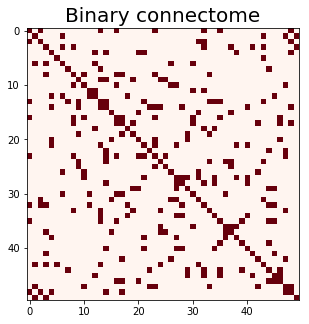

In [7]:
f = plt.figure(figsize=(5,5))
ax = plt.gca()
im = plt.imshow(fc_binary, clim=[0, 1],cmap='Reds')
plt.title('Binary connectome', fontsize=20)
plt.show()

In [8]:
# create a graph out of this binary matrix with use of nextworkx package:
G = nx.Graph()
# add nodes:
G.add_nodes_from(np.arange(Nvars))
# add edges:
connections = np.where(fc_binary == 1)
for ind in range(len(connections[0])):
    G.add_edge(connections[0][ind],connections[1][ind])

In [9]:
# check where the nodes and edges are in the graph:
print G.nodes()
print G.number_of_nodes()
print G.edges()
print G.number_of_edges

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[(0, 0), (0, 32), (0, 2), (0, 35), (0, 48), (0, 13), (0, 16), (0, 23), (1, 1), (1, 43), (1, 49), (1, 6), (1, 47), (2, 32), (2, 2), (2, 48), (2, 31), (3, 32), (3, 3), (3, 37), (3, 6), (3, 8), (3, 41), (3, 43), (3, 49), (4, 4), (4, 38), (4, 12), (4, 14), (4, 48), (4, 20), (4, 21), (5, 43), (5, 5), (6, 6), (6, 12), (6, 26), (6, 30), (7, 44), (7, 13), (7, 7), (8, 33), (8, 8), (8, 10), (8, 16), (8, 17), (8, 23), (9, 9), (9, 13), (9, 14), (9, 19), (9, 24), (9, 25), (10, 10), (10, 47), (10, 16), (10, 26), (10, 27), (11, 32), (11, 11), (11, 12), (11, 30), (12, 12), (12, 45), (12, 18), (13, 33), (13, 34), (13, 35), (13, 43), (13, 13), (13, 14), (13, 21), (14, 40), (14, 14), (14, 48), (14, 22), (14, 23), (14, 24), (14, 28), (15, 31), (15, 20), (15, 37), (15, 15), (16, 35), (16, 46), (16, 16), (16, 17), (1

/Users/nataliabielczyk/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/nataliabielczyk/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/nataliabielczyk/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/nataliabielczyk/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

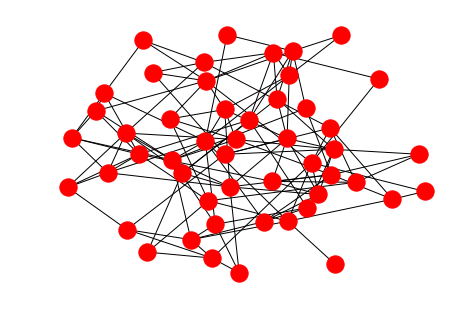

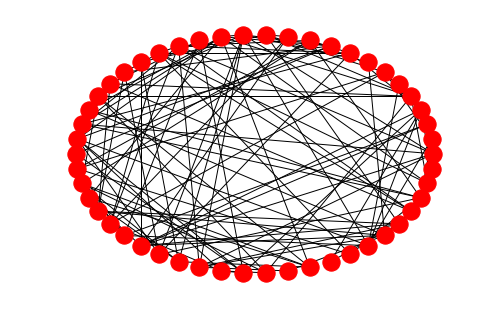

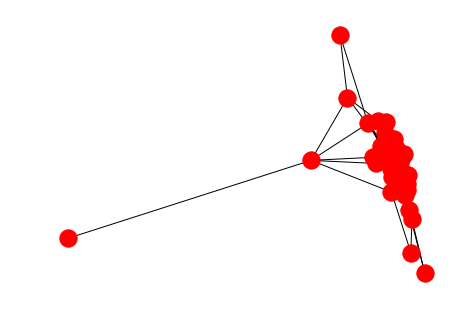

In [10]:
# draw the graph:
nx.draw(G)
plt.show()

nx.draw_circular(G)
plt.show()

nx.draw_spectral(G)
plt.show()

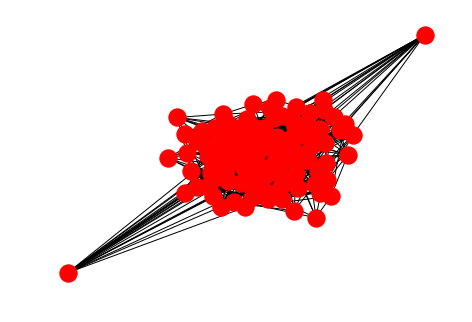

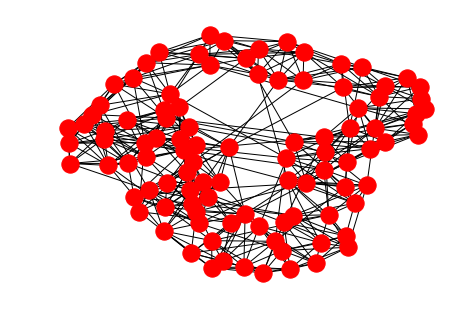

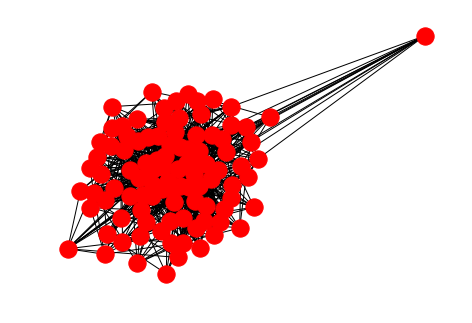

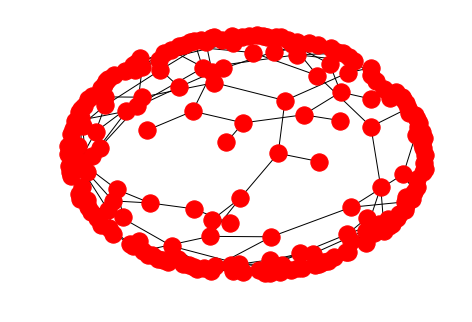

In [58]:
d = 0.15   # connection density
c = 10     # degree of small-worldness
er=nx.erdos_renyi_graph(100,d)        # random graph 
ws=nx.watts_strogatz_graph(100,c,d)   # small-world network obtained with Watts-Strogatz algorithm
ba=nx.barabasi_albert_graph(100,c)    # small-world network obtained with Barabasi-Albert algorithm
red=nx.random_lobster(100,c,d)        # no clue what this is :)

nx.draw(er)
plt.show()
nx.draw(ws)
plt.show()
nx.draw(ba)
plt.show()
nx.draw(red)
plt.show()

In [59]:
# [1] compute average clustering coefficient in the network (small worldness):
# 
print nx.average_clustering(G)
print nx.average_clustering(er)
print nx.average_clustering(ws)
print nx.average_clustering(ba)
print nx.average_clustering(red)

0.115285714286
0.148790256471
0.470393939394
0.2817140607
0.0


In [60]:
# [2] compute transitivity:
print nx.transitivity(G)
print nx.transitivity(er)
print nx.transitivity(ws)
print nx.transitivity(ba)
print nx.transitivity(red)

0.113673805601
0.146308113036
0.465993856955
0.256736565511
0.0


In [61]:
# [3] compute modularity:
partition = community_louvain.best_partition(G)
print "Louvain Modularity: ", community_louvain.modularity(partition, G)
print "Louvain Partition: ", partition

partition = community_louvain.best_partition(er)
print "Louvain Modularity: ", community_louvain.modularity(partition, er)
print "Louvain Partition: ", partition

partition = community_louvain.best_partition(ws)
print "Louvain Modularity: ", community_louvain.modularity(partition, ws)
print "Louvain Partition: ", partition

partition = community_louvain.best_partition(ba)
print "Louvain Modularity: ", community_louvain.modularity(partition, ba)
print "Louvain Partition: ", partition

partition = community_louvain.best_partition(red)
print "Louvain Modularity: ", community_louvain.modularity(partition, red)
print "Louvain Partition: ", partition

Louvain Modularity:  0.516151169843
Louvain Partition:  {0: 0, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 1, 7: 3, 8: 4, 9: 5, 10: 4, 11: 6, 12: 6, 13: 3, 14: 2, 15: 4, 16: 4, 17: 4, 18: 6, 19: 5, 20: 4, 21: 2, 22: 7, 23: 4, 24: 5, 25: 5, 26: 7, 27: 2, 28: 2, 29: 6, 30: 4, 31: 7, 32: 6, 33: 5, 34: 2, 35: 3, 36: 5, 37: 5, 38: 2, 39: 3, 40: 2, 41: 6, 42: 7, 43: 1, 44: 3, 45: 6, 46: 4, 47: 7, 48: 0, 49: 1}
Louvain Modularity:  0.204202574589
Louvain Partition:  {0: 0, 1: 1, 2: 2, 3: 2, 4: 3, 5: 1, 6: 0, 7: 2, 8: 4, 9: 0, 10: 0, 11: 1, 12: 5, 13: 2, 14: 2, 15: 4, 16: 2, 17: 0, 18: 6, 19: 4, 20: 5, 21: 4, 22: 0, 23: 1, 24: 6, 25: 1, 26: 4, 27: 3, 28: 1, 29: 2, 30: 4, 31: 1, 32: 2, 33: 2, 34: 0, 35: 2, 36: 6, 37: 0, 38: 2, 39: 3, 40: 5, 41: 5, 42: 3, 43: 1, 44: 0, 45: 1, 46: 2, 47: 3, 48: 2, 49: 3, 50: 4, 51: 3, 52: 4, 53: 2, 54: 2, 55: 0, 56: 4, 57: 2, 58: 2, 59: 4, 60: 4, 61: 3, 62: 3, 63: 6, 64: 6, 65: 6, 66: 1, 67: 2, 68: 2, 69: 4, 70: 3, 71: 2, 72: 2, 73: 3, 74: 2, 75: 5, 76: 6, 77: 4, 78: 2, 79: